In [1]:
import pandas as pd
from copy import copy
import numpy as np
import re

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.ndimage as ndimage

# Task 1

In [139]:
data1 = pd.read_csv('input1.txt', header=None, sep='\n')

sum_incr = data1[0].rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0]).sum().astype(int)
sum_window_incr = data1[0].rolling(3).sum().rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0]).sum().astype(int)

print('ans1: ' + str(sum_incr)) # 1766
print('ans2: ' + str(sum_window_incr)) # 1797

ans1: 1766
ans2: 1797


# Task 2

In [671]:
data2 = pd.read_csv('input2.txt', header=None, sep=' ')

sum_forward = data2[data2[0] == 'forward'][1].sum()
sum_down = data2[data2[0] == 'down'][1].sum()
sum_up = data2[data2[0] == 'up'][1].sum()

aim = 0
depth = 0

for a in data2.iterrows():
    if a[1][0] == 'forward':
        depth += aim * a[1][1]
    elif a[1][0] == 'down':
        aim += a[1][1]
    elif a[1][0] == 'up':
        aim -= a[1][1]

print('ans1: ' + str(sum_forward * (sum_down - sum_up))) # 1488669
print('ans2: ' + str(sum_forward * depth)) # 1176514794

ans1: 1488669
ans2: 1176514794


# Task 3

In [131]:
# 0101 ^ 1111 = 1010
5 ^ 15

10

In [672]:
data3 = pd.read_csv('input3.txt', header=None, sep=' ', dtype=str)

# 3.1
gamma_most_common = ''.join(data3[0].str.split('', expand=True).iloc[:, 1:-1].apply(lambda x: x.value_counts(), axis='index').idxmax().to_numpy())
gamma_rate = int(gamma_most_common, 2)

# 3.2
data3m1 = copy(data3[0].str.split('', expand=True).iloc[:, 1:-1])
data3m2 = copy(data3m1)

i = 0
while data3m1.shape[0] != 1:
    a = data3m1.iloc[:, i]
    a_count = a.value_counts()
    data3m1 = data3m1[a == ('1' if (a_count.shape == 2 and a_count[0] == a_count[1]) else a_count.idxmax())]
    i += 1

oxygen_rating = int(''.join(data3m1.to_numpy().flatten()), 2)

i = 0
while data3m2.shape[0] != 1:
    a = data3m2.iloc[:, i]
    a_count = a.value_counts()
    data3m2 = data3m2[a == ('0' if (a_count.shape == 2 and a_count[0] == a_count[1]) else a_count.idxmin())]
    i += 1

co2_rating = int(''.join(data3m2.to_numpy().flatten()), 2)

print('ans1: ' + str(gamma_rate * (gamma_rate ^ int('1' * len(gamma_most_common), 2)))) # 4191876
print('ans2: ' + str(oxygen_rating * co2_rating)) # 3424642

ans1: 4191876
ans2: 3424642


# Task 4

In [590]:
data4 = pd.read_csv('input4.txt', header=None, sep="\n", dtype=str)
data4h, data4d = data4.loc[0, :], data4.loc[1:, :]

data4d = data4d[0].str.strip().str.split('\s+', expand=True)
data4d1, data4d2 = copy(data4d), copy(data4d)
# display(data4d)

small_index = np.array_split(data4d.index, 500//5)

boards_won = []

res1, res2 = 0, 0

for num in data4h[0].split(','):
    data4d1 = data4d1.replace(num, np.nan)

    for i in range(100):
        if data4d1.loc[small_index[i], :].dropna(how='all', axis=0).dropna(how='all', axis=1).shape != (5,5):
            res1 = int(data4d1.loc[small_index[i], :].astype(float).sum().sum() * int(num))
            break
    
    if res1 != 0:
        break

for num in data4h[0].split(','):
    data4d2 = data4d2.replace(num, np.nan)
    
    for i in range(100):
        if i not in boards_won and data4d2.loc[small_index[i], :].dropna(how='all', axis=0).dropna(how='all', axis=1).shape != (5,5):
            boards_won.append(i)
            
            if len(boards_won) == 100:
                res2 = int(data4d2.loc[small_index[i], :].astype(float).sum().sum() * int(num))
                break
    
    if res2 != 0:
        break
        
print('ans1: ' + str(res1)) # 41503
print('ans2: ' + str(res2)) # 3178

ans1: 41503
ans2: 3178


# Task 5

In [591]:
data5 = pd.read_csv('input5.txt', header=None, sep="\n", dtype=str)
data5m = data5[0].str.split(r'[,(\-> )]', expand=True).drop(columns=[2, 3, 4]).astype(int)
size = data5m.max().max().astype(int)
grid1 = pd.DataFrame(np.zeros((size, size))).astype(int)
grid2 = pd.DataFrame(np.zeros((size, size))).astype(int)
# display(grid2)

for a in data5m.iterrows():
    x1 = a[1][0]
    x2 = a[1][5]
    y1 = a[1][1]
    y2 = a[1][6]
    
    if x1 == x2 or y1 == y2:
        x1, x2 = min(x1, x2), max(x1, x2)
        y1, y2 = min(y1, y2), max(y1, y2)
        
        grid1.loc[x1-1:x2-1, y1-1:y2-1] += 1
        grid2.loc[x1-1:x2-1, y1-1:y2-1] += 1
    else:
        if x2 > x1:
            xr1, xr2, xd = x1, x2+1, 1
        else:
            xr1, xr2, xd = x1, x2-1, -1
            
        if y2 > y1:
            yr1, yr2, yd = y1, y2+1, 1
        else:
            yr1, yr2, yd = y1, y2-1, -1
        
        for a, b in zip(range(xr1, xr2, xd), range(yr1, yr2, yd)):
            grid2.loc[a-1, b-1] += 1
        
print('ans1: ' + str(grid1[grid1 > 1].count().sum())) # 7085
print('ans2: ' + str(grid2[grid2 > 1].count().sum())) # 20271

ans1: 7085
ans2: 20271


# Task 6

In [592]:
data6 = pd.read_csv('input6.txt', header=None, sep="\n", dtype=str)
data6m = list(map(int, data6.loc[0, 0].split(',')))
# print(data6m,)

for day in range(80):
# for day in range(256):
    new_count = data6m.count(0)
    
    data6m = list(map(lambda x: x-1 if x != 0 else 6, data6m))
    if new_count > 0:
        data6m = data6m + ([8]*new_count)

# print(data6m,)
print(len(data6m))
print('ans1: ' + str(len(data6m))) # 377263

377263
ans1: 377263


# Task 7

In [804]:
with open("input7.txt", "r") as file:
    data7 = file.readline().strip()
data7m = list(map(int, data7.split(',')))
# print(data7m,)

fuels_used1, fuels_used2 = [], []

for a in range(2,max(data7m)):
    fuels_used1.append(sum(list(map(lambda x: abs(x-a), data7m))))
    fuels_used2.append(sum(list(map(lambda x: (abs(x-a)**2 + abs(x-a))//2, data7m))))

print('ans1: ' + str(min(fuels_used1))) # 352331
print('ans2: ' + str(min(fuels_used2))) # 99266250

ans1: 352331
ans2: 99266250


# Task 8

In [1061]:
a = ['a', 'e', 'g']
b = ['e', 'g']
list(set(a) - set(b))[0]

'a'

In [1062]:
data8 = pd.read_csv('input8.txt', header=None, sep="\n", dtype=str)
data8m = data8[0].str.split('|', expand=True)
data8mm = data8m[1].apply(lambda x: x.strip()).str.split(' ', expand=True).applymap(len)
# display(data8)
data8m2 = data8[0].str.replace('\|', '').str.split(expand=True).applymap(lambda x: ''.join(sorted(x)))

dis7map = {
    'ABCEFG': 0,
    'CF': 1,
    'ACDEG': 2,
    'ACDFG': 3,
    'BCDF': 4,
    'ABDFG': 5,
    'ABDEFG': 6,
    'ACF': 7,
    'ABCDEFG': 8,
    'ABCDFG': 9,
}

out_sum = 0

for a in data8m2.iterrows():
    b = a[1]
    map7 = {}
    
    map7['C'] = list(b[b.map(lambda x: len(x) == 2)].iloc[0])
    map7['F'] = copy(map7['C'])
    map7['A'] = list(set(list(b[b.map(lambda x: len(x) == 3)].iloc[0])) - set(map7['C']))[0]
    map7['B'] = list(set(list(b[b.map(lambda x: len(x) == 4)].iloc[0])) - set(map7['C']))
    map7['D'] = copy(map7['B'])
    map7['G'] = list(set(b[b.str.match(r''+('.*' + ('.*'.join(sorted([*map7['A'], *map7['B'], *map7['C']]))) + '.*')) & b.map(lambda x: len(x) == 6)].iloc[0]) - set(sorted([*map7['A'], *map7['B'], *map7['C']])))[0]
    map7['E'] = list(set(b[b.map(lambda x: len(x) == 7)].iloc[0]) - set(''.join(sorted([*map7['A'], *map7['B'], *map7['C'], *map7['G']]))))[0]
    map7['F'] = list(set(b[b.str.match(r''+('.*' + ('.*'.join(sorted([*map7['A'], *map7['B'], *map7['E'], *map7['G']]))) + '.*')) & b.map(lambda x: len(x) == 6)].iloc[0]) - set(''.join(sorted([*map7['A'], *map7['B'], *map7['E'], *map7['G']]))))[0]
    map7['C'] = list(set(map7['C']) - set(map7['F']))[0]
    map7['D'] = list(set(b[b.str.match(r''+('.*' + ('.*'.join(sorted([*map7['A'], *map7['C'], *map7['E'], *map7['G']]))) + '.*')) & b.map(lambda x: len(x) == 5)].iloc[0]) - set(''.join(sorted([*map7['A'], *map7['C'], *map7['E'], *map7['G']]))))[0]
    map7['B'] = list(set(map7['B']) - set(map7['D']))[0]
    
    map7inv = {v: k for k, v in map7.items()}
    out_num = b[-4:].apply(lambda x: dis7map[''.join(sorted(list(map(lambda y: map7inv[y], x))))])
    out = int(''.join(list(out_num.astype(str))))
    out_sum += out

print('ans1: ' + str(data8mm[(data8mm == 2) | (data8mm == 3) | (data8mm == 4) | (data8mm == 7)].count().sum())) # 445
print('ans1: ' + str(out_sum)) # 1043101

ans1: 445
ans1: 1043101


# Task 9

In [768]:
data9 = pd.read_csv('input9.txt', header=None, sep="\n", dtype=str)
data9m = data9[0].str.split('', expand=True).drop(columns=[0,101]).astype(int)
data9m.columns = list(range(100))
# display(data9m)

def low_points_risks(values):
    curr, others = values[2], values[[0,1,3,4]]
    
    return curr+1 if curr < others[~np.isnan(others)].min() else 0

footprint = np.array([
    [0,1,0],
    [1,1,1],
    [0,1,0]
])

data9m1 = ndimage.generic_filter(data9m, low_points_risks, footprint=footprint, mode='constant', cval=np.nan)
data9lab, _ = ndimage.label(data9m.applymap(lambda x: x < 9))
uniques, counts = np.unique(data9lab, return_counts=True)
res2 = pd.DataFrame(counts, index=uniques).drop(index=[0]).sort_values(by=0, ascending=False).head(3)[0].prod()

print('ans1: ' + str(data9m1.sum())) # 486
print('ans2: ' + str(res2)) # 1059300

ans1: 486
ans2: 1059300


In [808]:
# f, ax = plt.subplots(figsize=(24, 20))
# data9mm = data9m[data9m == 9]
# sns.heatmap(data9mm, cmap="YlGnBu");

# Day 10

In [666]:
data10 = pd.read_csv('input10.txt', header=None, sep="\n", dtype=str)

tag_map1 = {
    ')': 3,
    ']': 57,
    '}': 1197,
    '>': 25137,
    '': 0
}
tag_map2 = {
    ')': 1,
    ']': 2,
    '}': 3,
    '>': 4,
}

def remove_closed_tags(inp):
    while True:
        outp = re.sub(r'\(\)|\[\]|\{\}|\<\>', '', inp)
        if outp == inp:
            return outp
        inp = outp

def score2(inp):
    score = 0
    for a in inp:
        score *= 5
        score += tag_map2[a]
    return score

data10m = data10.applymap(remove_closed_tags).applymap(lambda x: (re.findall(r'\)|\]|\}|\>', x) or [''])[0])
res1 = data10m.applymap(lambda x: tag_map1[x])[0].sum()
res2 = data10.applymap(remove_closed_tags)[data10m[0] == ''].applymap(lambda x: x[::-1].replace('(', ')').replace('[', ']').replace('{', '}').replace('<', '>')).applymap(score2)[0].median()

print('ans1: ' + str(res1)) # 318099
print('ans2: ' + str(int(res2))) # 2389738699

ans1: 318099
ans2: 2389738699


# Task 11

In [806]:
data11 = pd.read_csv('input11.txt', header=None, sep="\n", dtype=str)
data11m = data11[0].str.split('', expand=True).drop(columns=[0,11]).astype(int).to_numpy()
display(data11m)

def test_func(values):
    curr, others = values[2], values[[0,1,3,4]]
#     print('============', values)
    return curr

footprint = np.array([
    [1,1,1],
    [1,0,1],
    [1,1,1]
])

for i in range(100):
#     print(i)
    ndimage.generic_filter(data11m, test_func, footprint=footprint, mode='constant', cval=np.nan)

array([[4, 1, 1, 2, 2, 5, 6, 3, 7, 2],
       [3, 1, 4, 3, 2, 5, 3, 7, 1, 2],
       [4, 5, 1, 6, 8, 4, 8, 6, 3, 1],
       [3, 7, 8, 3, 4, 7, 7, 1, 3, 7],
       [3, 7, 4, 6, 7, 2, 3, 5, 8, 2],
       [5, 8, 6, 1, 3, 5, 8, 8, 8, 4],
       [4, 8, 4, 3, 3, 5, 1, 7, 7, 4],
       [2, 3, 1, 6, 4, 4, 7, 6, 2, 1],
       [6, 6, 4, 3, 8, 1, 7, 7, 4, 5],
       [6, 3, 6, 6, 8, 1, 5, 8, 6, 8]])

# Task 12

In [1066]:
import networkx as nx

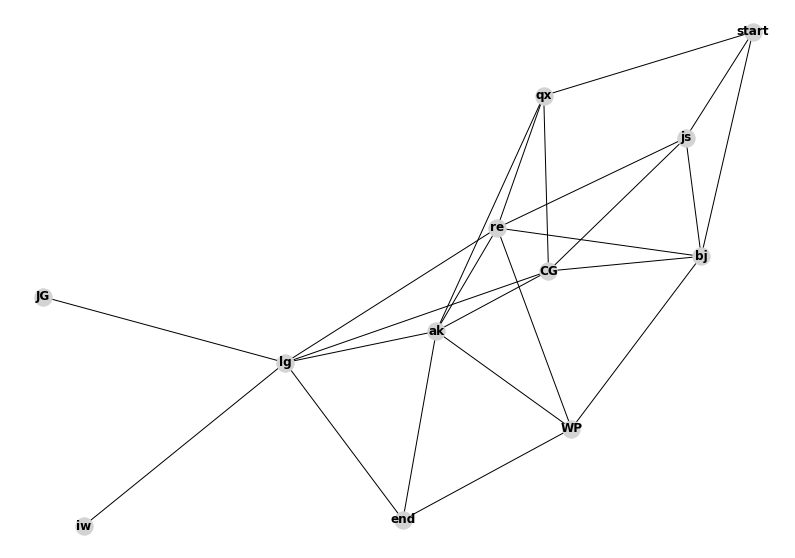

In [1087]:
data12 = pd.read_csv('input12.txt', header=None, sep="\n", dtype=str)
data12m = data12[0].str.split('-', expand=True)

G = nx.Graph()
data12m.apply(lambda x: G.add_edge(x[0], x[1]), axis=1)

f, ax = plt.subplots(figsize=(14, 10))
nx.draw(G, with_labels=True, font_weight='bold', node_color='lightgrey', font_color='k')

# Task 13

ans1: 661
ans2: 


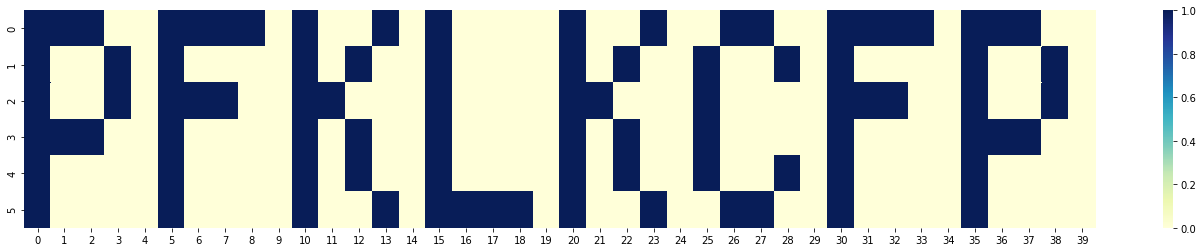

In [121]:
data13 = pd.read_csv('input13.txt', header=None, sep="\n", dtype=str)
data13d, data13f = data13[~data13[0].str.startswith('fold')], data13[data13[0].str.startswith('fold')]
data13d = data13d[0].str.split(',', expand=True).astype(int)
data13f = data13f[0].str.replace('fold along ', '').str.split('=', expand=True).reset_index(drop=True)
# display(data13d)
# display(data13f)

grid_size = data13f[data13f[0] == 'x'][1].astype(int).max()*2+1, data13f[data13f[0] == 'y'][1].astype(int).max()*2+1
grid = pd.DataFrame(np.zeros(grid_size)).T

for a in data13d.iterrows():
    grid.loc[a[1][1], a[1][0]] = 1

new_grid = copy(grid)
    
for fold in data13f.iterrows():
    if fold[1][0] == 'x':
        first_half = new_grid.loc[:, :int(fold[1][1])-1]
        second_half_rev = new_grid.loc[:, :int(fold[1][1])+1:-1].set_axis(first_half.columns, axis=1)
        new_grid = first_half + second_half_rev
    else:
        first_half = new_grid.loc[:int(fold[1][1])-1, :]
        second_half_rev = new_grid.loc[:int(fold[1][1])+1:-1, :].reset_index(drop=True)
        new_grid = first_half + second_half_rev
    
    if fold[0] == 0:
        res1 = new_grid.astype(bool).sum().sum()
    
    
print('ans1: ' + str(res1)) # 661
print('ans2: ') # PFKLKCFP
f, ax = plt.subplots(figsize=(24, 4))
sns.heatmap(new_grid.astype(bool), cmap="YlGnBu");

# Task 14

In [65]:
import itertools

In [188]:
data14 = pd.read_csv('input14.txt', header=None, sep="\n", dtype=str)
data14t = data14.loc[0, 0]
data14p = data14.loc[1:, 0].str.split(' -> ', expand=True)
# display(data14t)
data14tu = pd.Series(list(data14t)).unique()
data14tup = pd.DataFrame([[a[0]+a[1]+a[2]] for a in list(itertools.product(data14tu, data14tu, data14tu))])
# display(data14tup)

# display(data14p.apply(lambda x: x[0][0]+x[1]+x[0][1], axis=1))
#repl = data14p.apply(lambda x: [x[0], x[0][0]+x[1]+x[0][1]], axis=1, result_type='expand').set_index(0).to_dict()[1]
repl = data14p.apply(lambda x: [x[0], x[0][0]+x[1]+x[0][1]], axis=1, result_type='expand')#.set_index(0).to_dict()[1]
repl_dict = repl.set_index(0).to_dict()[1]
# display(repl_dict)
# repl2 = repl.apply(lambda x: [x[1], repl_dict[x[1][:2]]+repl_dict[x[1][1:]][1:]], axis=1, result_type='expand')
# display(repl2)

repl3 = data14tup.apply(lambda x: [x[0], repl_dict[x[0][:2]]+repl_dict[x[0][1:]][1:]], axis=1, result_type='expand')
repl3_dict = repl3.set_index(0).to_dict()[1]
# data14tup = data14tup.apply(lambda x: x[:2])
# display(repl3)
# display(repl3_dict)

new_template = copy(data14t)
new_template3 = copy(new_template)
display(new_template)
display(new_template3)

display(repl_dict['CP'])
display(repl3_dict['PPF'], repl3_dict['FCH'])

for i in range(10):
#     display(new_template)
    print(i, )
#     pairs = [data14t[k]+data14t[k+1] for k, x in enumerate(data14t[:-1])]
#     display(pairs)

#     display(new_template3)
    new_template = ''.join([repl_dict[new_template[k]+new_template[k+1]][:-1] for k, x in enumerate(new_template[:-1])])+new_template[-1]
    new_template3 = ''.join([
        (repl3_dict[new_template3[k]+new_template3[k+1]+new_template3[k+2]][:-1] if k%2==0 else '') for k, x in enumerate(new_template3[:-2])
    ])# + repl3_dict[new_template3[-3:]]
#     display(new_template)
#     display(new_template3)
#     new_pairs = list(map(lambda x: x+'2', pairs))
#     display(new_pairs)

# display(new_template3)
counts = pd.Series(list(new_template)).value_counts()
# print(counts.max() - counts.min())

print('ans1: ' + str(counts.max() - counts.min())) # 2027

'PPFCHPFNCKOKOSBVCFPP'

'PPFCHPFNCKOKOSBVCFPP'

'CVP'

'POPHF'

'FNCKH'

0
1
2
3
4
5
6
7
8
9
ans1: 2027


# Task 20

In [119]:
data20 = pd.read_csv('input20.txt', header=None, sep="\n", dtype=str)
data20a = pd.DataFrame([data20.loc[0, 0]])[0].str.split('', expand=True).drop(columns=[0,513]).replace({'#': 1, '.': 0})
data20i = data20.loc[1:, 0].str.split('', expand=True).drop(columns=[0,101]).replace({'#': 1, '.': 0})

padding = iterations = 50
data20i.columns = range(padding, 100+padding)
data20i.index = range(padding, 100+padding)
data20i[[*range(padding), *range(100+padding, 100+2*padding)]] = 0
data20i = data20i.append(pd.DataFrame(0, index=[*range(padding), *range(100+padding, 100+2*padding)], columns=data20i.columns))
data20i = data20i.reindex(sorted(data20i.columns), axis=1)
data20i = data20i.reindex(sorted(data20i.index), axis=0)

def to_index(values):
    return data20a.loc[0, int(''.join(map(str, map(int, values))), 2)+1]

footprint = np.array([
    [1,1,1],
    [1,1,1],
    [1,1,1]
])

out = copy(data20i)

for i in range(iterations):
    out = pd.DataFrame(ndimage.generic_filter(out, to_index, footprint=footprint, mode='constant', cval=i%2))
#     display(out)
    if i == 1:
        res1 = out.sum().sum()

#     f, ax = plt.subplots(figsize=(16, 14))
#     sns.heatmap(out.astype(bool), cmap="YlGnBu");

print('ans1: ' + str(res1)) # 5301
print('ans2: ' + str(out.sum().sum())) # 19492

ans1: 5301
ans2: 19492
